# Sprint 機械学習スクラッチ クラスタリング

## 1.このSprintについて

### Sprintの目的
- スクラッチを通してK-meansを理解する
- クラスタ分析を行う

### どのように学ぶか
- スクラッチでK-meansを実装した後、それを使用しクラスタ分析を行います。

## 2.K-meansスクラッチ

K-meansのクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。

以下に雛形を用意してあります。このScratchKMeansクラスにコードを書き加えていってください。

### 《雛形》

```
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol  tol
        self.verbose = verbose
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        pass
        return
```

## クラスタリングのための人工データセット
クラスタリングを実験するための人工データセットを作成するコードを用意しています。


このmake_blobs関数は正解ラベルも出力してますが、今回は使用しません。使用しないことを明示するために、 _（アンダースコア） で受け取っています。


《シンプルデータセット3》

In [1]:
# ライブラリインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
X[:10, :]

array([[ 0.72086751,  3.71347124],
       [-1.89468423,  7.96898545],
       [ 1.35678894,  4.36462484],
       [ 1.05374379,  4.49286859],
       [ 1.59141542,  4.90497725],
       [ 0.78260667,  4.15263595],
       [-1.95751686,  3.87291474],
       [-0.77354537,  7.87923564],
       [ 0.12313498,  5.27917503],
       [-1.43284669,  7.71577043]])

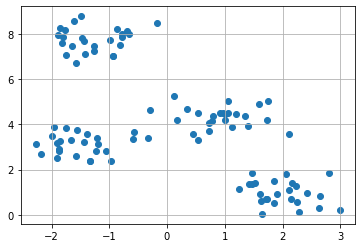

In [3]:
plt.scatter(X[:,0], X[:,1])
plt.grid(True)
plt.show()

## 学習
K-meansの学習に必要な要素を順番に作成していきます。

## 【まとめ】最終コード

In [4]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters=3, n_init=10, max_iter=1, tol=1e-5, verbose=False, verbose_interval=1, random_state=None):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.verbose_interval = verbose_interval
        self.random_state = random_state

        
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        self.n_samples = X.shape[0]
        self.n_features = X.shape[1]
        self.results_dict = {}
        self.result_ = {'sse': None, 'center': None}
        self.sse_dict = {}
        self.best_result = {'sse': None, 'center': None}
        
        # 問題6 - 異なる初期値で計算
        for n_trials in range(self.n_init):
            self.cluster_center_p = None
            self.sse = []
            if self.verbose:
                print('[INFO] TRIAL COUNT : {} START'.format(n_trials))
              
            # 問題1 - 中心点の初期値の設定
            self.cluster_center_p = self._initial_value_generation(X, n_trials)

            # 問題5 - self.max_iterの回数を繰り返す
            for i in range(self.max_iter):
                # 問題3 - クラスタへの割り当て
                cluster_flg = self._assign_to_cluster(X, self.cluster_center_p)

                # 問題4 - 中心点の移動
                self.cluster_center_p, diff_g = self._move_center(X, cluster_flg)

                # 問題2 - SSEを求める
                self.sse.append(self._calc_sse(X, self.cluster_center_p, cluster_flg))

                # 問題5 - 移動前後の重心の距離がself.tol以下の場合は処理終了
                if diff_g <= self.tol:
                    if self.verbose:
                        print('[INFO] The processing is skipped because the movement distance after learning is less than or equal to the threshold.')
                    break
   
                #verboseをTrueにした際は学習過程を出力
                if self.verbose and i % self.verbose_interval == 0:
                    print('[INFO] LOOP COUNT : {}'. format(i))
                    print('[INFO] SSE : {:.3f}'.format(self.sse[-1]))
                    print('[INFO] Diff_g : {:.3f}'.format(diff_g))
                    print('[INFO] Cluster_center_point : \n{}'.format(self.cluster_center_p))
                    for j in range(self.n_clusters):
                        data = X[np.where(cluster_flg[:,j] == 1)[0]]
                        plt.scatter(data[:, 0], data[:, 1], alpha=.7)
                    plt.scatter(self.cluster_center_p[:,0], self.cluster_center_p[:,1], marker='*', c='black', s=80, alpha=.7)
                    plt.grid(True)
                    plt.show()

            self._set_results(n_trials)
            
        if self.verbose:
            pprint(self.results_dict)
        self._set_best_results()
        
   

    # 問題1 - 中心点の初期値決定
    def _initial_value_generation(self, X, n_trials):
        """
        中心点の初期値を決める処理
        """
        if self.random_state != None:
            np.random.seed(self.random_state + n_trials)
        idx = np.random.choice(np.arange(self.n_samples), self.n_clusters)
        initial_points = X[idx,:]
        initial_points = X[np.random.choice(self.n_samples, self.n_clusters, replace=False)]
        return initial_points


    # 問題2 - SSEを求める関数
    def _calc_sse(self, X, cluster_center_p, cluster_flg):
        """
        SSEを算出
        """
        sse = 0
        rnk = cluster_flg
        for k, mu_k in enumerate(cluster_center_p):
            sse += np.sum(rnk[:, k] * np.sqrt(np.sum((X - mu_k)**2, axis=1))**2)
#             sse += np.sum(rnk[:, k] * np.linalg.norm(X - mu_k, axis=1, ord=2)**2)
        return sse
    
    
    
    # 問題3 - クラスタへの割り当て
    def _assign_to_cluster(self, X, cluster_center_p):
        """
        データ毎に最も近いクラスタ中心点を求め、そのクラスタに割り当てる
        """
        d = np.zeros([X.shape[0], self.n_clusters])
        cluster_flg = np.zeros([X.shape[0], self.n_clusters])
        
        for i, value in enumerate(cluster_center_p):
            d[:, i] = np.linalg.norm(X-value, axis=1)
        d_min = np.min(d, axis=1)
        for j in range(self.n_clusters):
            cluster_flg[:, j] = d[:, j] == d_min
        return cluster_flg
    
    
    
    # 問題4 - 中心点の移動
    def _move_center(self, X, cluster_flg):
        """
        クラスタの中心座標を移動する処理
        """
        cluster_center_p = [] 
        for i in range(self.n_clusters):
            idx = np.where(cluster_flg[:, i] == 1)[0]
            X_mean = np.mean(X[idx, :], axis=0)
            if np.any(np.isnan(X_mean)):   # あるクラスタに1つもデータがアサインされなかった場合の処理
                X_mean = np.array([0, 0])
            cluster_center_p.append(X_mean)
        diff_g = np.linalg.norm(self.cluster_center_p - cluster_center_p)
        return np.array(cluster_center_p), diff_g
    

    
    # 学習結果をインスタンス変数へセット
    def _set_results(self, n_trials):
        """
        学習後のSSE・クラスタ中心座標をインスタンス変数へセット
        """
        self.result_['sse'] = self.sse[-1].copy()
        self.result_['center'] = self.cluster_center_p.copy()
        self.results_dict[n_trials] = self.result_.copy()
        self.sse_dict[n_trials] = self.sse.copy()
        
    def _set_best_results(self):
        _, self.best_result = min(self.results_dict.items(), key=lambda x: x[1]['sse'])
        
        
　　# 問題7 - 推定
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        flg = self._assign_to_cluster(X, self.best_result['center'])
        pred = np.zeros(X.shape[0])
        for cluster_num in range(flg.shape[1]):
            pred[np.where(flg[:, cluster_num] == 1)[0]] = cluster_num
        
        return pred

    


## 【問題1】中心点の初期値を決める
入力されたデータから 
$K$  個の中心点 $\mu_1$ から $\mu_k$ の初期値を決めるコードを作成してください。

$K$ は指定したクラスタ数です。


最もシンプルな初期値の決定方法は、データ点 $X_n$ の中からランダムに$K$ 個選ぶことです。今回はこれを実装してください。

K-meansの学習結果は中心点 
$\mu の初期値に影響を受けます。そのため、学習時には複数個の初期値で計算を行います。

In [5]:
def initial_value_generation(X, K, random_state=None):
    n_samples = len(X)
    if random_state != None:
        np.random.seed(random_state)
    idx = np.random.choice(np.arange(n_samples), K)
    points = X[idx]
    return points

initial_cluster = initial_value_generation(X, 3, random_state=0)
initial_cluster

array([[-1.87418794,  2.84306499],
       [-1.84482705,  3.25609891],
       [ 1.42002502,  1.38236201]])

## 【問題2】SSEを求める関数の作成
クラスタ内誤差平方和（SSE, Sum of Squared Errors）を計算する関数を作成してください。


K-meansはこのSSEを最小化する$r_{nk}$ と $\mu_k$ を求めることが目的となります。複数個の初期値で計算したクラスタリング結果から、どれを最終的に採用するかを決める際にこのSSEを求める関数を使用します。
 
 $$
   SSE = 
   \sum_{n=1}^{N}\sum_{k=1}^{K}r_{nk}\parallel X_n -\mu_k \parallel ^2
 $$
 
 
$n$ : データ点のインデックス

$k$ : クラスタのインデックス

$X_n$ : n番目のデータ点

$\mu_k$ : k番目の中心点

$r_{nk}$ : データ点

$X_n$ がクラスタkに所属していたら1、そうでなければ0

In [8]:
def calc_sse(X, cluster_center_p, cluster_flg):
    sse = 0
    rnk = cluster_flg
    for k, mu_k in enumerate(cluster_center_p):
        sse += np.sum(rnk[:, k] * np.sqrt(np.sum((X - mu_k)**2, axis=1))**2)
    return np.sum(sse)
    
calc_sse(X, initial_cluster, cluster_flg)

763.5950358664259

## クラスタの割り当てと中心点の移動を繰り返す
K-meansの学習の基本は以下の2つのフェーズを繰り返すことです。


- 中心点 $\mu_k$ を固定した上で SSE を最小化する クラスタの割り当て $r_{nk}$ を選ぶ。
- クラスタの割り当て $r_{nk}$ を固定した上で SSE を最小化する 中心点 $\mu_k$ を選ぶ。

最初の中心点 $\mu_k$ は問題1で作成した初期値です。

順番に見ていきます。

## 【問題3】クラスタへの割り当て
全てのデータ点 
$X_n$
 を最も近い中心点 
$\mu_k$ に割り当てるコードを作成してください。


K-menasにおける 近い とは点と点のユークリッド距離が小さくなることです。ユークリッド距離とはピタゴラスの定理（三平方の定理）で求められるものですが、ベクトル 
p
,
q
 に対しては以下の数式で表現できます。
 
 $$
   \parallel q - p \parallel
   = \sqrt{(q-p)(q-p)}
 $$
 
 NumPyにはこの関数がnp.linalg.normとして用意されているため使用してください。


numpy.linalg.norm — NumPy v1.17 Manual


中心点 
$\mu_k$ を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

In [7]:
def assign_to_cluster(cluster_center_p):
    cluster_num = cluster_center_p.shape[0]
    d = np.zeros([X.shape[0], cluster_num])
    cluster_flg = np.zeros([X.shape[0], cluster_num])
    for i, value in enumerate(cluster_center_p):
        d[:, i] = np.linalg.norm(X-value, axis=1)        
    d_min = np.min(d, axis=1)
    for j in range(cluster_num):
        cluster_flg[:, j] = d[:, j] == d_min
    return cluster_flg

cluster_flg = assign_to_cluster(initial_cluster)
print(cluster_flg[:10,:])

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


## 【問題4】中心点の移動
中心点 
μ
k
 を 
k
 番目のクラスタに割り当てられる全てのデータ点 
X
n
 の平均値（重心）に移動するコードを作成してください。


クラスタの割り当て 
r
n
k
 を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

In [9]:
def move_center(X, cluster_flg):
    K = cluster_flg.shape[1]
    cluster_center_p = []  
    for i in range(K):
        idx = np.where(cluster_flg[:, i] == 1)
        X_mean = np.mean(X[idx])
        cluster_center_p.append(X_mean)
    return np.array(cluster_center_p)

move_center(X, cluster_flg)
    

array([0.55023631, 2.43329192, 1.88653812])

## 【問題5】繰り返し
クラスタへの割り当てと中心点の移動を繰り返すことで学習を行うコードを作成してください。


次のどれかの条件を満たしたらこれを止めます。


- 繰り返しが指定した回数に到達する。（雛形では引数max_iter）
- 中心点 
$\mu_k$ と重心の差の合計が指定した許容値以下になる。（雛形では引数tol）

[INFO] TRIAL COUNT : 0 START
[INFO] LOOP COUNT : 0
[INFO] SSE : 224.423
[INFO] Diff_g : 2.674
[INFO] Cluster_center_point : 
[[-1.70034154  2.56008241]
 [ 1.53310186  4.29574378]
 [ 1.99186903  0.96561071]
 [-0.43512292  6.2792891 ]
 [-1.48824837  3.64827202]]


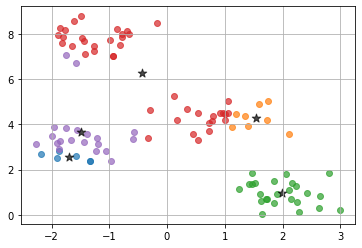

[INFO] LOOP COUNT : 1
[INFO] SSE : 51.342
[INFO] Diff_g : 1.695
[INFO] Cluster_center_point : 
[[-1.59946592  2.67853606]
 [ 1.01398702  4.26996419]
 [ 1.99186903  0.96561071]
 [-1.21460762  7.66822082]
 [-1.31266797  3.53972826]]


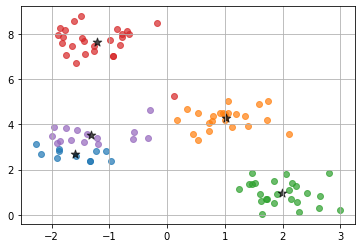

[INFO] LOOP COUNT : 2
[INFO] SSE : 44.518
[INFO] Diff_g : 0.172
[INFO] Cluster_center_point : 
[[-1.62549893  2.7209503 ]
 [ 0.92578447  4.32475792]
 [ 1.99186903  0.96561071]
 [-1.26811733  7.76378266]
 [-1.34445636  3.48290927]]


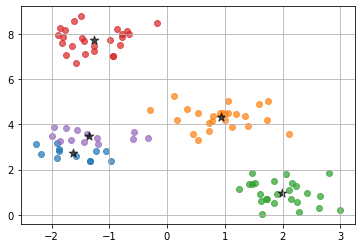

[INFO] The processing is skipped because the movement distance after learning is less than or equal to the threshold.
{0: {'center': array([[-1.62549893,  2.7209503 ],
       [ 0.92578447,  4.32475792],
       [ 1.99186903,  0.96561071],
       [-1.26811733,  7.76378266],
       [-1.34445636,  3.48290927]]),
     'sse': 44.518088858985195}}


In [10]:
skm = ScratchKMeans(n_clusters=5, n_init=1, max_iter=10, tol=0.000001, verbose=True, verbose_interval=1, random_state=10)
skm.fit(X)

## 【問題6】異なる初期値で計算
問題5の繰り返しを、指定した回数初期値を変更して計算するコードを作成してください。回数は雛形では引数n_initで指定します。


複数計算した中でSSEが最小になったものが最終的な学習結果となるため、その時の中心点 
$\mu_k$
 を保持しておきます。

[INFO] TRIAL COUNT : 0 START
[INFO] LOOP COUNT : 0
[INFO] SSE : 220.757
[INFO] Diff_g : 3.081
[INFO] Cluster_center_point : 
[[-1.14392531  6.35459317]
 [ 1.57966224  1.42212237]
 [ 0.62600954  5.3098476 ]
 [ 2.1858487   0.75078169]
 [-1.60922625  2.9946495 ]]


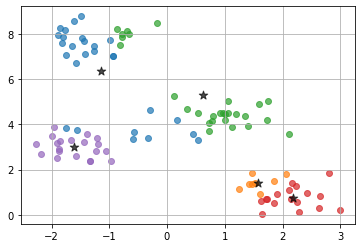

[INFO] LOOP COUNT : 1
[INFO] SSE : 46.396
[INFO] Diff_g : 1.751
[INFO] Cluster_center_point : 
[[-1.26811733  7.76378266]
 [ 1.69078503  1.63395666]
 [ 0.87639434  4.35593098]
 [ 2.18750143  0.7110816 ]
 [-1.47935679  3.11716896]]


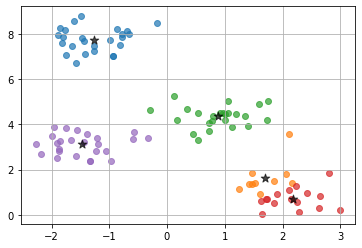

[INFO] LOOP COUNT : 2
[INFO] SSE : 43.655
[INFO] Diff_g : 0.181
[INFO] Cluster_center_point : 
[[-1.26811733  7.76378266]
 [ 1.77716425  1.52054822]
 [ 0.92578447  4.32475792]
 [ 2.11264047  0.65345836]
 [-1.47935679  3.11716896]]


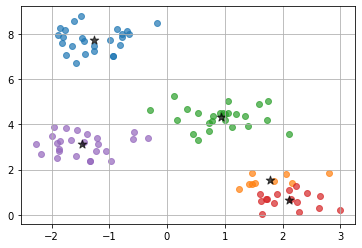

[INFO] LOOP COUNT : 3
[INFO] SSE : 43.511
[INFO] Diff_g : 0.067
[INFO] Cluster_center_point : 
[[-1.26811733  7.76378266]
 [ 1.82279289  1.49358843]
 [ 0.92578447  4.32475792]
 [ 2.10458645  0.61362557]
 [-1.47935679  3.11716896]]


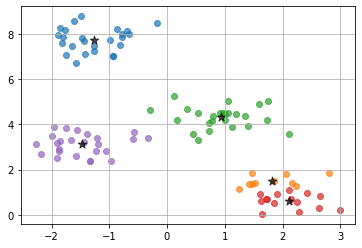

[INFO] The processing is skipped because the movement distance after learning is less than or equal to the threshold.
[INFO] TRIAL COUNT : 1 START
[INFO] LOOP COUNT : 0
[INFO] SSE : 197.892
[INFO] Diff_g : 1.515
[INFO] Cluster_center_point : 
[[-1.26190116  8.05130127]
 [ 1.45882675  2.64518431]
 [-1.40086422  7.20236927]
 [-1.47935679  3.11716896]
 [-0.1666378   8.50372399]]


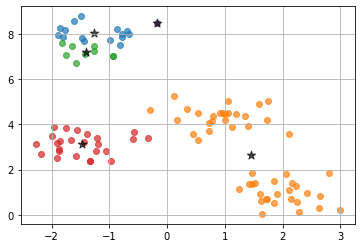

[INFO] LOOP COUNT : 1
[INFO] SSE : 189.153
[INFO] Diff_g : 0.327
[INFO] Cluster_center_point : 
[[-1.29347692  8.08996941]
 [ 1.55210864  2.51387291]
 [-1.20949849  7.05549506]
 [-1.37462309  3.21323103]
 [-0.1666378   8.50372399]]


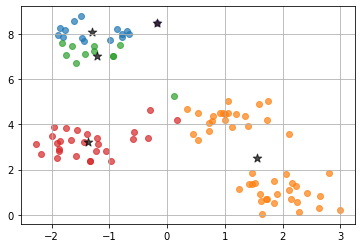

[INFO] LOOP COUNT : 2
[INFO] SSE : 187.515
[INFO] Diff_g : 0.137
[INFO] Cluster_center_point : 
[[-1.32871114  8.05840812]
 [ 1.57824421  2.46651075]
 [-1.14824933  6.99938957]
 [-1.31303397  3.26606323]
 [-0.1666378   8.50372399]]


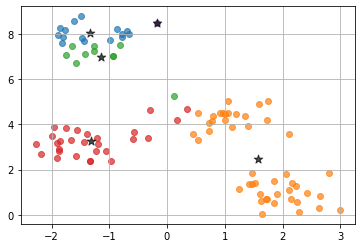

[INFO] LOOP COUNT : 3
[INFO] SSE : 186.490
[INFO] Diff_g : 0.347
[INFO] Cluster_center_point : 
[[-1.39214678  8.013581  ]
 [ 1.60157104  2.42138346]
 [-1.09250364  6.94480117]
 [-1.24953153  3.30851755]
 [-0.43253189  8.33340794]]


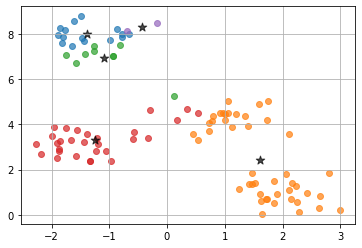

[INFO] LOOP COUNT : 4
[INFO] SSE : 184.649
[INFO] Diff_g : 0.378
[INFO] Cluster_center_point : 
[[-1.61856623  8.00804656]
 [ 1.60157104  2.42138346]
 [-1.09250364  6.94480117]
 [-1.24953153  3.30851755]
 [-0.65717281  8.13033646]]


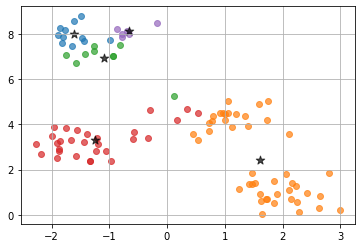

[INFO] LOOP COUNT : 5
[INFO] SSE : 184.353
[INFO] Diff_g : 0.099
[INFO] Cluster_center_point : 
[[-1.68176111  8.03388253]
 [ 1.60157104  2.42138346]
 [-1.09250364  6.94480117]
 [-1.24953153  3.30851755]
 [-0.70423633  8.07595794]]


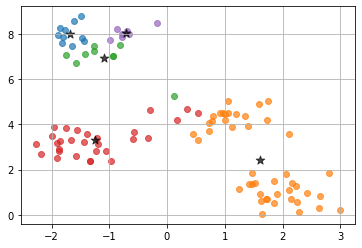

[INFO] LOOP COUNT : 6
[INFO] SSE : 184.202
[INFO] Diff_g : 0.107
[INFO] Cluster_center_point : 
[[-1.68176111  8.03388253]
 [ 1.60157104  2.42138346]
 [-1.12658653  6.87415791]
 [-1.24953153  3.30851755]
 [-0.71868685  8.0052066 ]]


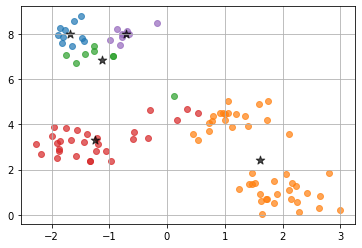

[INFO] The processing is skipped because the movement distance after learning is less than or equal to the threshold.
[INFO] TRIAL COUNT : 2 START
[INFO] LOOP COUNT : 0
[INFO] SSE : 342.824
[INFO] Diff_g : 2.568
[INFO] Cluster_center_point : 
[[ 1.71300632  0.59788882]
 [ 1.17666094  4.10244075]
 [ 2.12600416  0.98939113]
 [-1.00662615  5.44122617]
 [ 0.44957317  2.10385521]]


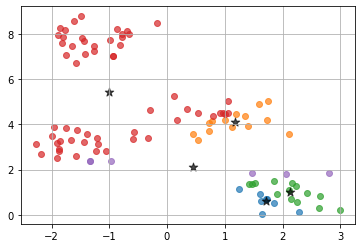

[INFO] LOOP COUNT : 1
[INFO] SSE : 188.933
[INFO] Diff_g : 2.058
[INFO] Cluster_center_point : 
[[ 1.71300632  0.59788882]
 [ 0.94817785  4.2444715 ]
 [ 2.16399809  1.09298018]
 [-1.33551723  6.45489368]
 [-1.16104444  2.75425537]]


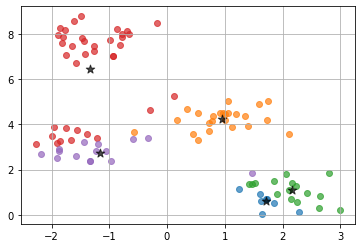

[INFO] LOOP COUNT : 2
[INFO] SSE : 46.012
[INFO] Diff_g : 1.404
[INFO] Cluster_center_point : 
[[ 1.77338766  0.59315213]
 [ 0.92578447  4.32475792]
 [ 2.1147648   1.17511866]
 [-1.26811733  7.76378266]
 [-1.47935679  3.11716896]]


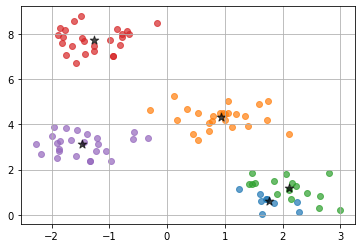

[INFO] LOOP COUNT : 3
[INFO] SSE : 44.545
[INFO] Diff_g : 0.296
[INFO] Cluster_center_point : 
[[ 1.97719002  0.54493144]
 [ 0.92578447  4.32475792]
 [ 2.00541889  1.35393004]
 [-1.26811733  7.76378266]
 [-1.47935679  3.11716896]]


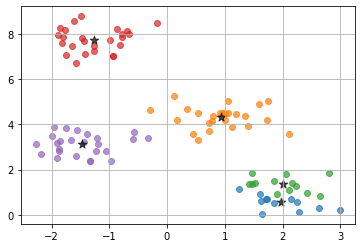

[INFO] LOOP COUNT : 4
[INFO] SSE : 43.738
[INFO] Diff_g : 0.161
[INFO] Cluster_center_point : 
[[ 2.0792508   0.54950539]
 [ 0.92578447  4.32475792]
 [ 1.89720544  1.41639148]
 [-1.26811733  7.76378266]
 [-1.47935679  3.11716896]]


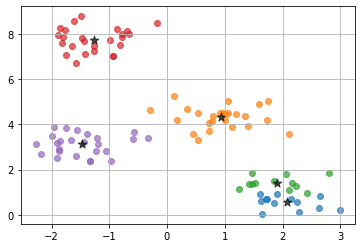

[INFO] LOOP COUNT : 5
[INFO] SSE : 43.399
[INFO] Diff_g : 0.093
[INFO] Cluster_center_point : 
[[ 2.14218884  0.55246837]
 [ 0.92578447  4.32475792]
 [ 1.82902257  1.41318158]
 [-1.26811733  7.76378266]
 [-1.47935679  3.11716896]]


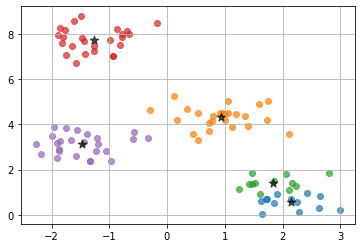

[INFO] The processing is skipped because the movement distance after learning is less than or equal to the threshold.
{0: {'center': array([[-1.26811733,  7.76378266],
       [ 1.82279289,  1.49358843],
       [ 0.92578447,  4.32475792],
       [ 2.10458645,  0.61362557],
       [-1.47935679,  3.11716896]]),
     'sse': 43.51132973500559},
 1: {'center': array([[-1.68176111,  8.03388253],
       [ 1.60157104,  2.42138346],
       [-1.12658653,  6.87415791],
       [-1.24953153,  3.30851755],
       [-0.71868685,  8.0052066 ]]),
     'sse': 184.20243516863303},
 2: {'center': array([[ 2.14218884,  0.55246837],
       [ 0.92578447,  4.32475792],
       [ 1.82902257,  1.41318158],
       [-1.26811733,  7.76378266],
       [-1.47935679,  3.11716896]]),
     'sse': 43.399045060509756}}


In [11]:
skm = ScratchKMeans(n_clusters=5, n_init=3, max_iter=10, tol=1e-10, verbose=True, verbose_interval=1, random_state=0)
skm.fit(X)

In [12]:
# 最終的なSSEとクラスタ中心のベクトル
skm.best_result

{'sse': 43.399045060509756,
 'center': array([[ 2.14218884,  0.55246837],
        [ 0.92578447,  4.32475792],
        [ 1.82902257,  1.41318158],
        [-1.26811733,  7.76378266],
        [-1.47935679,  3.11716896]])}

## 【問題7】推定
新たなデータに対してどのクラスタに所属するかの推定の際は、学習時の1つ目のフェーズと同じことを行います。


- データ点 
$X_n$ と学習で決まった中心点 $\mu_k$ に対し、SSE を最小化する $r_{nk}$ を選ぶ。

具体的には次のことです。

- データ点 
$X_n$ を最も近い$\mu_k$ に割り当てる。

In [13]:
# データ分割
X_train, X_test= train_test_split(X, test_size=.25, random_state=0)

[INFO] TRIAL COUNT : 0 START
[INFO] LOOP COUNT : 0
[INFO] SSE : 58.628
[INFO] Diff_g : 2.417
[INFO] Cluster_center_point : 
[[ 1.28298703  4.48154778]
 [-0.94466954  3.1513136 ]
 [-0.77955965  4.12484831]
 [-1.23920571  7.73872714]
 [ 2.06105512  0.8798154 ]]


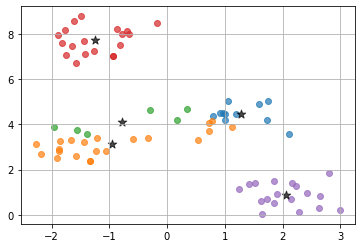

[INFO] LOOP COUNT : 1
[INFO] SSE : 37.293
[INFO] Diff_g : 0.636
[INFO] Cluster_center_point : 
[[ 1.07957818  4.3017967 ]
 [-1.47682026  2.97751029]
 [-0.91236134  4.11887054]
 [-1.23920571  7.73872714]
 [ 2.06105512  0.8798154 ]]


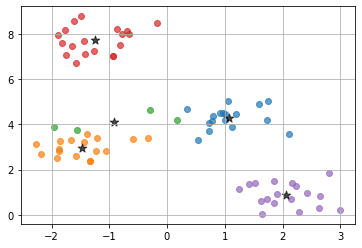

[INFO] LOOP COUNT : 2
[INFO] SSE : 34.899
[INFO] Diff_g : 0.425
[INFO] Cluster_center_point : 
[[ 1.02900834  4.29599784]
 [-1.63343782  2.98309769]
 [-0.69742645  3.79154421]
 [-1.23920571  7.73872714]
 [ 2.06105512  0.8798154 ]]


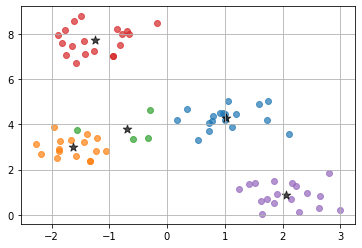

[INFO] LOOP COUNT : 3
[INFO] SSE : 34.499
[INFO] Diff_g : 0.292
[INFO] Cluster_center_point : 
[[ 1.02900834  4.29599784]
 [-1.62917824  3.02965392]
 [-0.40956033  3.79720774]
 [-1.23920571  7.73872714]
 [ 2.06105512  0.8798154 ]]


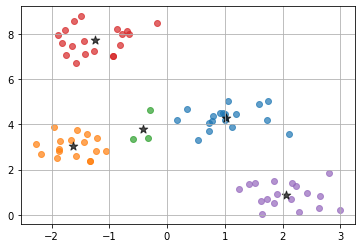

[INFO] LOOP COUNT : 4
[INFO] SSE : 33.503
[INFO] Diff_g : 0.323
[INFO] Cluster_center_point : 
[[ 1.11377824  4.36357218]
 [-1.62917824  3.02965392]
 [-0.10539653  3.7804859 ]
 [-1.23920571  7.73872714]
 [ 2.06105512  0.8798154 ]]


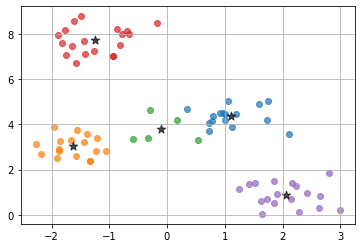

[INFO] The processing is skipped because the movement distance after learning is less than or equal to the threshold.
[INFO] TRIAL COUNT : 1 START
[INFO] LOOP COUNT : 0
[INFO] SSE : 70.397
[INFO] Diff_g : 1.736
[INFO] Cluster_center_point : 
[[ 1.42334167  4.52447272]
 [-0.7263098   3.46759731]
 [-1.32150224  6.99924609]
 [-1.20981409  8.00282752]
 [ 2.06105512  0.8798154 ]]


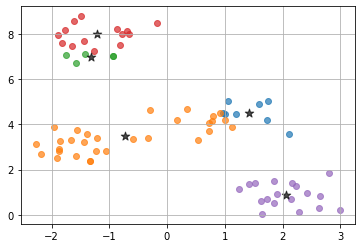

[INFO] LOOP COUNT : 1
[INFO] SSE : 40.044
[INFO] Diff_g : 0.727
[INFO] Cluster_center_point : 
[[ 1.11377824  4.36357218]
 [-1.28286421  3.20029755]
 [-1.360767    7.10547555]
 [-1.16829496  8.1081239 ]
 [ 2.06105512  0.8798154 ]]


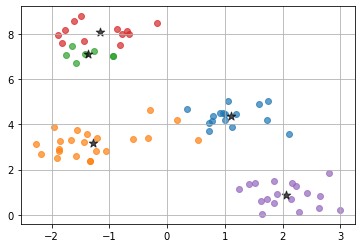

[INFO] LOOP COUNT : 2
[INFO] SSE : 32.820
[INFO] Diff_g : 0.343
[INFO] Cluster_center_point : 
[[ 0.9590487   4.3136083 ]
 [-1.5065519   3.06658649]
 [-1.35191106  7.2072029 ]
 [-1.13777089  8.21709896]
 [ 2.06105512  0.8798154 ]]


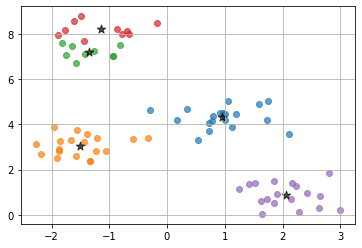

[INFO] LOOP COUNT : 3
[INFO] SSE : 32.683
[INFO] Diff_g : 0.083
[INFO] Cluster_center_point : 
[[ 0.9590487   4.3136083 ]
 [-1.5065519   3.06658649]
 [-1.36000463  7.25805965]
 [-1.10498469  8.27280213]
 [ 2.06105512  0.8798154 ]]


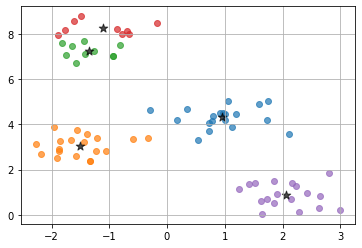

[INFO] The processing is skipped because the movement distance after learning is less than or equal to the threshold.
[INFO] TRIAL COUNT : 2 START
[INFO] LOOP COUNT : 0
[INFO] SSE : 184.608
[INFO] Diff_g : 1.862
[INFO] Cluster_center_point : 
[[-1.066295    2.82011617]
 [-0.20092245  6.09237214]
 [ 2.5471818   1.2781506 ]
 [ 1.78165559  0.87218563]
 [-1.76336843  3.21036084]]


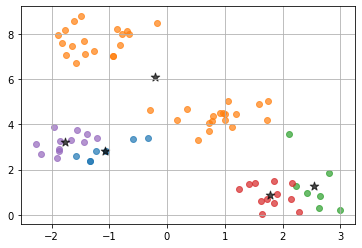

[INFO] LOOP COUNT : 1
[INFO] SSE : 162.325
[INFO] Diff_g : 0.918
[INFO] Cluster_center_point : 
[[-0.3489376   3.24388169]
 [-0.33471701  6.44475006]
 [ 2.4987097   1.29162967]
 [ 1.74731473  0.82547676]
 [-1.76336843  3.21036084]]


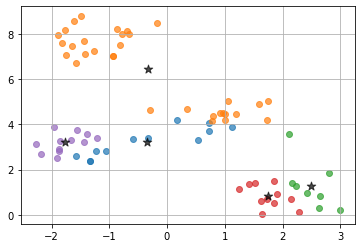

[INFO] LOOP COUNT : 2
[INFO] SSE : 76.237
[INFO] Diff_g : 1.716
[INFO] Cluster_center_point : 
[[ 0.63529146  4.1275654 ]
 [-0.87102461  7.36409926]
 [ 2.42703963  1.31576929]
 [ 1.7366783   0.75713582]
 [-1.62917824  3.02965392]]


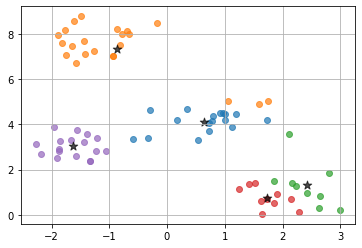

[INFO] LOOP COUNT : 3
[INFO] SSE : 36.253
[INFO] Diff_g : 0.637
[INFO] Cluster_center_point : 
[[ 0.89432969  4.26743399]
 [-1.23920571  7.73872714]
 [ 2.44389163  1.14072405]
 [ 1.8174319   0.71378263]
 [-1.5716197   3.04861229]]


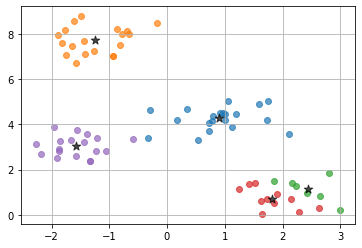

[INFO] LOOP COUNT : 4
[INFO] SSE : 35.162
[INFO] Diff_g : 0.177
[INFO] Cluster_center_point : 
[[ 0.9590487   4.3136083 ]
 [-1.23920571  7.73872714]
 [ 2.46652615  1.03316489]
 [ 1.7366783   0.75713582]
 [-1.5065519   3.06658649]]


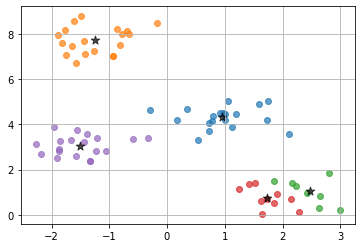

[INFO] LOOP COUNT : 5
[INFO] SSE : 35.000
[INFO] Diff_g : 0.131
[INFO] Cluster_center_point : 
[[ 0.9590487   4.3136083 ]
 [-1.23920571  7.73872714]
 [ 2.55407574  0.9652047 ]
 [ 1.74731473  0.82547676]
 [-1.5065519   3.06658649]]


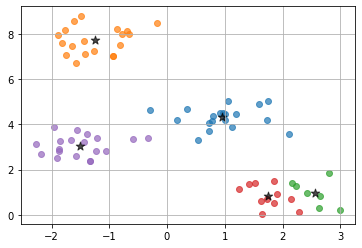

[INFO] LOOP COUNT : 6
[INFO] SSE : 34.819
[INFO] Diff_g : 0.141
[INFO] Cluster_center_point : 
[[ 0.9590487   4.3136083 ]
 [-1.23920571  7.73872714]
 [ 2.52082862  0.86074684]
 [ 1.69323633  0.89507026]
 [-1.5065519   3.06658649]]


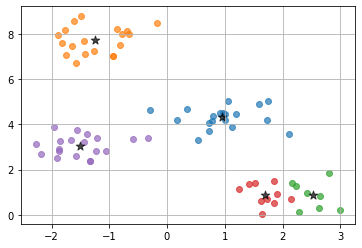

[INFO] LOOP COUNT : 7
[INFO] SSE : 34.700
[INFO] Diff_g : 0.071
[INFO] Cluster_center_point : 
[[ 0.9590487   4.3136083 ]
 [-1.23920571  7.73872714]
 [ 2.47895661  0.84252755]
 [ 1.64315364  0.91710326]
 [-1.5065519   3.06658649]]


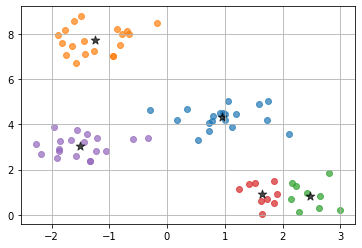

[INFO] The processing is skipped because the movement distance after learning is less than or equal to the threshold.
{0: {'center': array([[ 1.11377824,  4.36357218],
       [-1.62917824,  3.02965392],
       [-0.10539653,  3.7804859 ],
       [-1.23920571,  7.73872714],
       [ 2.06105512,  0.8798154 ]]),
     'sse': 33.50283635717538},
 1: {'center': array([[ 0.9590487 ,  4.3136083 ],
       [-1.5065519 ,  3.06658649],
       [-1.36000463,  7.25805965],
       [-1.10498469,  8.27280213],
       [ 2.06105512,  0.8798154 ]]),
     'sse': 32.68258811752134},
 2: {'center': array([[ 0.9590487 ,  4.3136083 ],
       [-1.23920571,  7.73872714],
       [ 2.47895661,  0.84252755],
       [ 1.64315364,  0.91710326],
       [-1.5065519 ,  3.06658649]]),
     'sse': 34.69960999856754}}


array([1., 4., 0., 2., 0., 1., 4., 3., 1., 2., 1., 0., 4., 3., 3., 4., 1.,
       0., 4., 0., 1., 4., 0., 4., 3.])

In [14]:
skm = ScratchKMeans(n_clusters=5, n_init=3, max_iter=10, tol=1e-10, verbose=True, verbose_interval=1, random_state=0)
skm.fit(X_train)
pred = skm.predict(X_test)
pred

In [65]:
def show_glaph(X, pred, model):
    for i in range(model.n_clusters):
        data = X[pred == i, :]
        text = 'cluster : ' + str(i)
        plt.scatter(data[:,0], data[:,1], label=text)
    plt.scatter(model.best_result['center'][:, 0], model.best_result['center'][:, 1], marker='*', s=70, alpha=.7, c='black')
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()

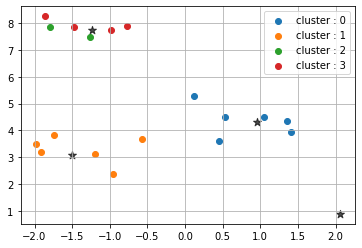

In [66]:
show_glaph(X_test, pred, skm)

## 【問題8】エルボー法の実装
K-meansにおいて中心点の個数 
k
 は人為的に決める必要がありますが、その判断方法としてエルボー法があります。エルボー法により中心点の個数 
k
 を検討するためのコードを作成してください。


SSEを縦軸、クラスタ数 
k
 を横軸にした折れ線グラフを表示します。このためにK-meansのインスタンスからはSSEを取得できるようにしてください。

C:\Users\yoshi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\yoshi\Anaconda3\lib\site-packages\numpy\core\_methods.py:153: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


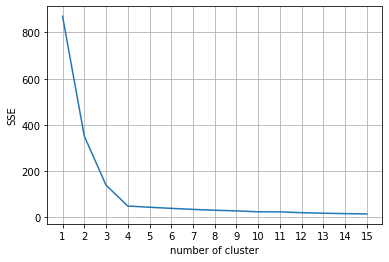

In [17]:
def elbow(X, max_k=10, n_init=10, max_iter=10):
    sse_list = []
    for i in range(1, max_k+1):
        model = ScratchKMeans(n_clusters=i, n_init=10, max_iter=10, tol=1e-20, verbose=False, verbose_interval=1, random_state=0)
        model.fit(X)
        sse_list.append(model.best_result['sse'])
    x = list(range(1, max_k+1))
    plt.plot(x, sse_list)
    plt.xlabel('number of cluster')
    plt.ylabel('SSE')
    plt.xticks(x)
    plt.grid(True)
    plt.show()
    del model
        
elbow(X, max_k=15)

## 【問題9】（アドバンス課題）シルエット図
k
 を決める助けになるものとしてシルエット図もあります。シルエット図を表示するコードを作成してください。


Matplotlibを使い図を表示するコードは用意しました。以下を与えてください。


silhouette_vals : shape(n_samples,)のndarray、各データ点のシルエット係数


silhouette_avg : float、シルエット係数の平均値


y_km : shape(n_samples,)のndarray、各データ点のクラスタラベル名


cluster_labels : list、クラスタのラベル名のリスト


n_clusters : int、クラスタ数


n
 番目のデータ点に対するシルエット係数 
s
n
 は以下の数式でを求められます。この数式を実装し、シルエット図を確認してください。
 
 
 a
n
 : 凝集度。同じクラスタ内の他のデータ点との距離の平均値。


b
n
 : 乖離度。最も近い他のクラスタ内の全てのデータ点との距離の平均値。


乖離度 
b
 が大きく、凝集度 
a
 が小さい時が理想的であり、シルエット係数 
s
 は1に近くなります。

### 《シルエット図を表示するためのコード》

```
from matplotlib import cm
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()
```

#### 【参考サイト】
<a href="https://hkawabata.github.io/technical-note/note/ML/Evaluation/silhouette-analysis.html" style="text-decoration:none">
    シルエット分析
</a>


In [18]:
from matplotlib import cm

def view_silhouette(X, X_clus_labels, n_clusters=None, cluster_labels=None, with_learning=False, max_clusters=15, n_init=10):

    if cluster_labels == None:
        cluster_labels = np.unique(X_clus_labels)
    if n_clusters == None:
        n_clusters = len(np.unique(X_clus_labels))
        
    if not with_learning:
        max_clusters = n_clusters
        min_clusters = n_clusters
    else:
        min_clusters = 2

    for k in range(min_clusters, max_clusters+1):
        if with_learning:
            model = ScratchKMeans(n_clusters=k, n_init=n_init, max_iter=100, tol=1e-20, verbose=False, verbose_interval=1, random_state=0)
            model.fit(X)
            X_clus_labels = model.predict(X)
            n_clusters = k
            cluster_labels = np.unique(X_clus_labels)
            
        y_km = X_clus_labels
        silhouette_vals = np.zeros(X.shape[0])
        for i, X_i in enumerate(X):
            # 凝集度の計算
            Xi_cluster_no = X_clus_labels[i]
            own_cluster_X_idx = np.where(X_clus_labels == Xi_cluster_no)[0]   # 自分のクラスタに属するXのIDX
            X_c = X[own_cluster_X_idx, :]    # 自分のクラスタに属する全Xデータ
            a = np.linalg.norm(X_i - X_c) / (len(X_c) - 1)

            # 乖離度の計算
            other_cluster_X = np.delete(X, own_cluster_X_idx, axis=0)    # 他のクラスタのXデータ
            other_cluster_X_labels = np.delete(X_clus_labels, own_cluster_X_idx, axis=0)  # 他のクラスタのラベル値
            near_X_idx = np.argmin(np.linalg.norm(X_i - other_cluster_X, axis=1)) # X_iから最も近い他クラスタのデータを取得
            near_X_label = other_cluster_X_labels[near_X_idx]      # 上記IDXに対応するクラスタのラベルの値を取得
            near_cluster_X_idx = np.where(other_cluster_X_labels == near_X_label)[0]      # 上記で取得したクラスタに含まれる全データのIDXを取得
            b = np.linalg.norm(X_i - other_cluster_X[near_cluster_X_idx, :]) / len(near_cluster_X_idx)  # 乖離度計算

            # シャッフル係数の計算
            silhouette_vals[i] = np.array([(b - a) / max(a, b)])
        silhouette_avg = np.mean(silhouette_vals)

        y_ax_lower, y_ax_upper = 0, 0
        yticks = []
        for i, c in enumerate(cluster_labels):
            c_silhouette_vals = silhouette_vals[y_km == c]
            c_silhouette_vals.sort()
            y_ax_upper += len(c_silhouette_vals)
            color = cm.jet(i / n_clusters)
            plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
            yticks.append((y_ax_lower + y_ax_upper) / 2)
            y_ax_lower += len(c_silhouette_vals)
        plt.axvline(silhouette_avg, color="red", linestyle="--")
        plt.yticks(yticks, cluster_labels + 1)
        plt.ylabel('Cluster')
        plt.xlabel('Silhouette coefficient')
        plt.show()

In [19]:
skm = ScratchKMeans(n_clusters=4, n_init=3, max_iter=10, tol=1e-10, verbose=False, verbose_interval=1, random_state=0)
skm.fit(X_train)
train_pred = skm.predict(X_train)

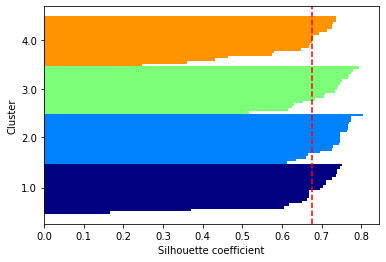

In [20]:
view_silhouette(X_train, train_pred, n_clusters=None, cluster_labels=None)

## 3.クラスタ分析

## 卸売業者のデータ分析
クラスタリングを利用法を学ぶために、Wholesale customers Data Setを使用します。

<a href="https://archive.ics.uci.edu/ml/datasets/Wholesale+customers" style='test-decoration:none'>
UCI Machine Learning Repository: Wholesale customers Data Set
</a>

Data Folderの中からWholesale customers data.csvをダウンロードしてください。これはポルトガルのリスボンにある卸売業者（wholesale）が顧客から集めたデータです。中身は各顧客が年間でミルクや食料品を何ユーロ購入しているかというデータになっています。顧客は小売店やレストランです。RegionとChannelは取り覗き、金額のデータでK-meansを利用します。



In [21]:
df = pd.read_csv('../data/Wholesale customers data.csv')
# RegionとChannelは除外
df.drop(['Region', 'Channel'], axis=1, inplace=True)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


## 次元削減
金額に関する特徴量は6個ありますが、可視化するために次元削減を行います。これに関してはscikit-learnによるPCAのサンプルコードを用意したので利用してください。

### 《PCAのサンプルコード》

```
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)
```

### 《PCAの分散説明率を表示するコードサンプル》
```
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()
```

In [22]:
from sklearn.decomposition import PCA
data = np.array(df.copy())
pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)

[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


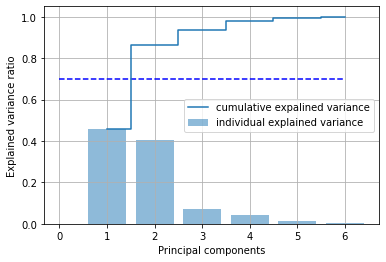

In [23]:
pca = PCA(n_components=None)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

## 【問題10】クラスタ数kの選択
最適だと思われるクラスタ数 
k
 を選択してください。エルボー法やシルエット図を活用する他、人間が後々どう利用したいのかも選択に関わってきます。選択した上で、なぜそれを選んだか説明してください。

### 【考察】
前提として、PCAの分散説明率の結果より、'Fresh','Milk'の2変数で8割以上を説明できているため、この2変数で最適なクラスタ数を検討する。

結論としては、最適なクラスタ数K＝5とする。

エルボー法では、K=2,5,7,11においてやや強い折れ曲がりが生じているが、K=2では分類が不十分（SSEが高い）であり、

K=11ではSSEはかなり低いものの、分類が多すぎると考えられる。

問題文にもあるように、このクラスタリングの結果を何に利用するかによって、最適なクラスタ数は異なると思うが、

例えばマーケティング用途として考えた際、K=11のようにクラスタ数を増加させるに従って、行うべき施策数・アプローチのパターン数が増加してしまい、コストが増大してしまう。

またクラスタ数の増加がコスト増に繋がるのに加えて、クラスタ当たりの顧客数(アプローチ対象の母数)が減少するため、ROIも低下する。

K=7かK=5かで検討することができる思うが、K=5の時点ですでに'Fresh'志向の顧客, 'Milk'志向の顧客をキレイに分類できているため、K=7までの細かさが必要かは疑問。

また、K=5で分類をしたうえで、下図の赤と紫のクラスタは共に(程度の差はあれ)'Milk'志向のクラスタであるため、これらを1つのクラスタとして扱う余地もあると考られる。

尚、今回のクラスタを機械学習の特徴量として使用することを考えるような場合には、K=11以上で検討することも可能と考える。


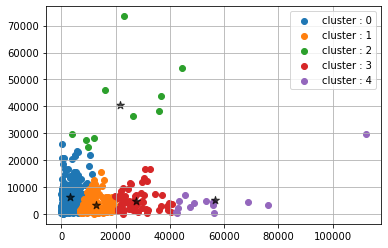

In [68]:
data = np.array(df.copy())
data = data[:, 0:2].copy()
model01 = ScratchKMeans(n_clusters=5, n_init=3, max_iter=20, tol=1e-10, verbose=False, verbose_interval=1, random_state=0)
model01.fit(data)
X_cluster_labels = model01.predict(data)
show_glaph(data, X_cluster_labels, model01)

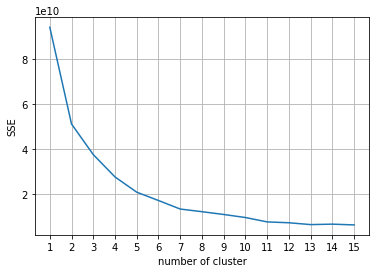

In [25]:
elbow(data, max_k=15, n_init=10, max_iter=100)

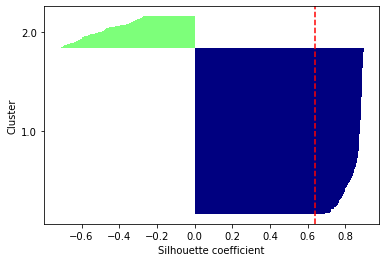

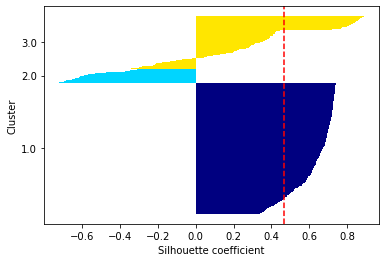

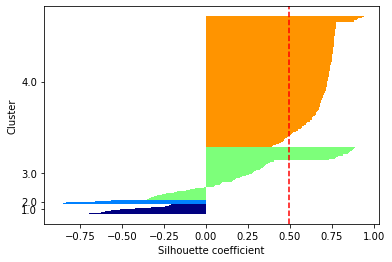

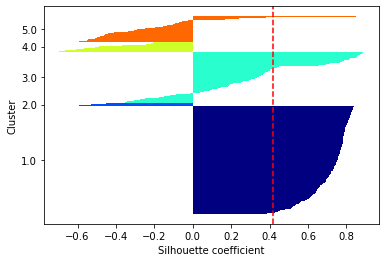

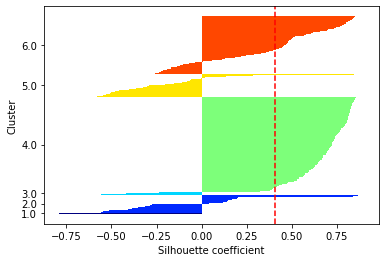

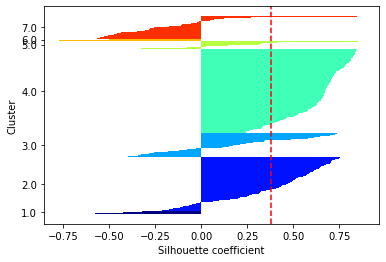

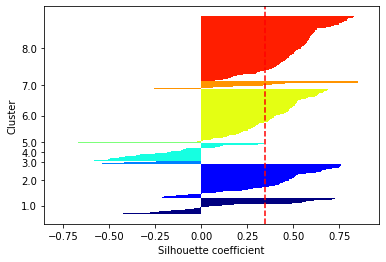

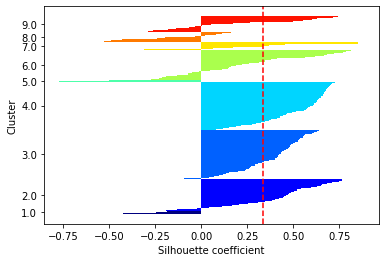

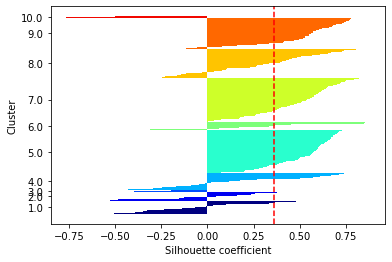

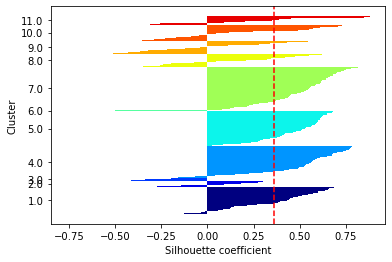

<ipython-input-18-4a3fdec809b1>:31: RuntimeWarning: invalid value encountered in double_scalars
  a = np.linalg.norm(X_i - X_c) / (len(X_c) - 1)


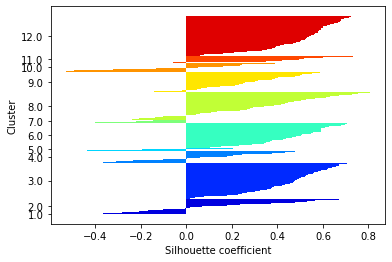

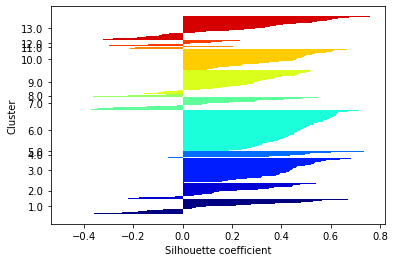

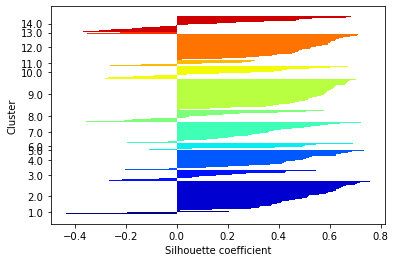

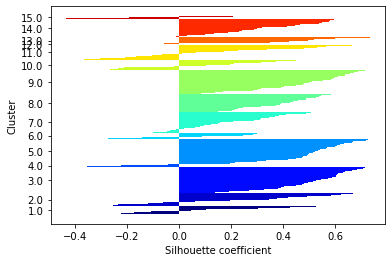

In [26]:
view_silhouette(data, X_clus_labels=None, n_clusters=None, cluster_labels=None, with_learning=True, max_clusters=15, n_init=20)

### PCAの主成分を特徴量に使用

通常の特徴量を入れた場合と似た結果となっている。

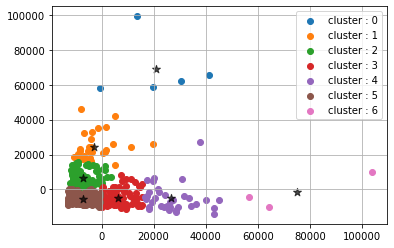

In [67]:
data = data_pca.copy()
model02 = ScratchKMeans(n_clusters=7, n_init=20, max_iter=20, tol=1e-15, verbose=False, verbose_interval=1, random_state=0)
model02.fit(data)
X_cluster_labels = model02.predict(data)
show_glaph(data, X_cluster_labels, model02)

### ※個人的なテスト（変数を標準化した場合）


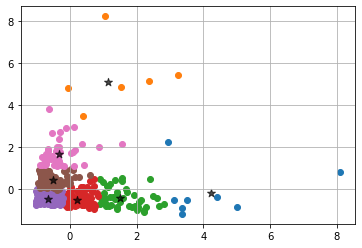

In [28]:
sc = StandardScaler()
data_std = sc.fit_transform(data)
model03 = ScratchKMeans(n_clusters=7, n_init=3, max_iter=20, tol=1e-10, verbose=False, verbose_interval=1, random_state=0)
model03.fit(data_std)
X_cluster_labels = model03.predict(data_std)
show_glaph(data_std, X_cluster_labels, model03)

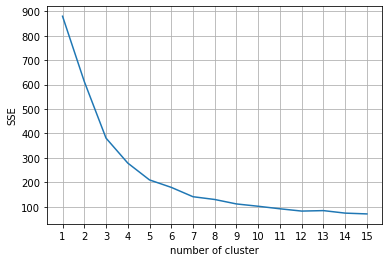

In [29]:
elbow(data_std, max_k=15, n_init=10, max_iter=100)

### ※個人的なテスト（対数変換した場合）
結果の解釈が困難なため、基本的に対数変換は行わない？

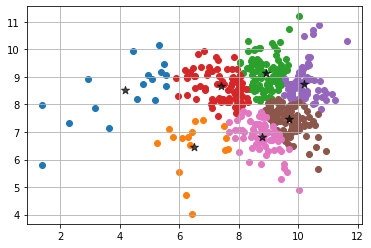

In [58]:
data = np.log(data + 1)
model01 = ScratchKMeans(n_clusters=7, n_init=3, max_iter=20, tol=1e-10, verbose=False, verbose_interval=1, random_state=0)
model01.fit(data)
X_cluster_labels = model01.predict(data)
show_glaph(data, X_cluster_labels, model01)

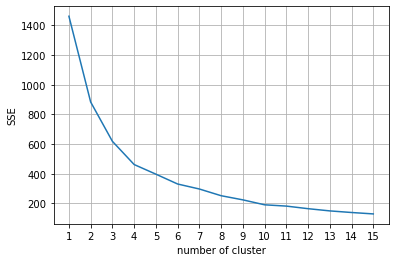

In [59]:
elbow(data, max_k=15, n_init=10, max_iter=100)

## 【問題11】既知のグループとの比較
RegionとChannelはK-meansに使用しなかったが、これれらは既知のグループです。クラスタとこれら既知のグループがどう違うかを確認し、説明してください。まずはそれぞれを可視化してください。



### 考察
Channelでの分類の場合は、やや'Fresh', 'Milk'での分類ができているが、RegionやChannel*Regionでの分類では、

他のグループと分布が重なり合ってしまっているため、今回の特徴量を分類するための情報として考えると不適であると言える。

ただし、既述の通りChannelはやや分類ができているため、channel別にクラスタリングを実行することで、よりよく分類ができる可能性もあるのではないかと推察する。

In [32]:
df_all = pd.read_csv('../data/Wholesale customers data.csv')
df_all.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [33]:
df_all['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [34]:
df_all['Region'].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [35]:
df_all['Channel_Region'] = df_all['Channel'].astype(str).str.cat(df_all['Region'].astype(str), sep='').astype(int)
df_all.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_Region
0,2,3,12669,9656,7561,214,2674,1338,23
1,2,3,7057,9810,9568,1762,3293,1776,23
2,2,3,6353,8808,7684,2405,3516,7844,23
3,1,3,13265,1196,4221,6404,507,1788,13
4,2,3,22615,5410,7198,3915,1777,5185,23


In [36]:
def cat_scatter(df, cat_column):
    values = df[cat_column].unique()
    for val in values:
        df_tmp = df[df[cat_column] == val].drop(cat_column, axis=1).copy()
        if len(str(val)) == 2:
            label_name = 'Channel=' + str(val)[0] + ', Region=' + str(val)[1]
        else:
            label_name = cat_column + '=' + str(val)
        plt.scatter(df_tmp.iloc[:,0], df_tmp.iloc[:,1], label=label_name, alpha=.5)
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

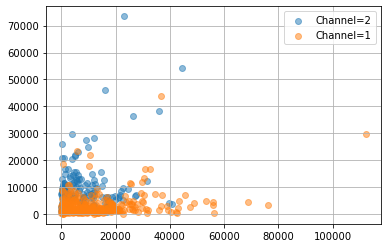

In [60]:
# Chanelでの分類
cat_scatter(df_all[['Fresh', 'Milk', 'Channel']], 'Channel')

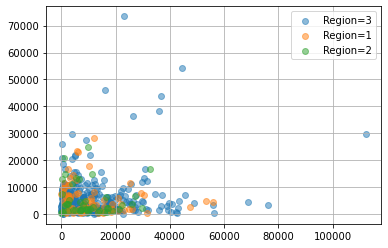

In [61]:
# Regionでの分類
cat_scatter(df_all[['Fresh', 'Milk', 'Region']], 'Region')

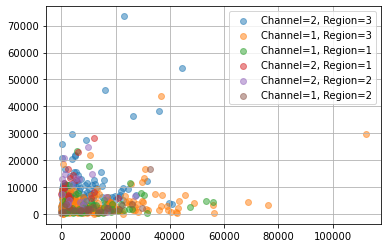

In [62]:
# Chanel * Regionでの分類
cat_scatter(df_all[['Fresh', 'Milk', 'Channel_Region']], 'Channel_Region')

## 【問題12】卸売業者にとって有益な情報
卸売業者にとって有益な情報を探し出し文章にまとめてください。


《ヒント》


前処理を行う前のデータを使い、各クラスタの要約統計量を見るなどしてみましょう。また、PCAで次元削減したデータに対してK-meansを使用しましたが、6個の特徴量をそのまま使ったり、一部の特徴量のみを使ったりということも試してみてください。既知のグループとの比較結果も参考にしてください。


条件ごとにデータを見る際にはPandasのgroupbyが便利です。


pandas.DataFrame.groupby — pandas 0.23.4 documentation

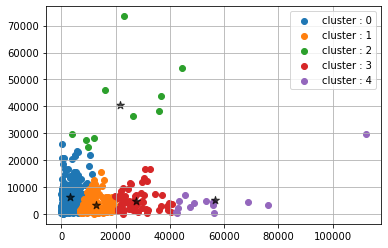

In [69]:
data = np.array(df.copy())
data = data[:, 0:2].copy()
model01 = ScratchKMeans(n_clusters=5, n_init=3, max_iter=20, tol=1e-10, verbose=False, verbose_interval=1, random_state=0)
model01.fit(data)
X_cluster_labels = model01.predict(data)
show_glaph(data, X_cluster_labels, model01)

In [40]:
df13 = pd.read_csv('../data/Wholesale customers data.csv')
df13.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


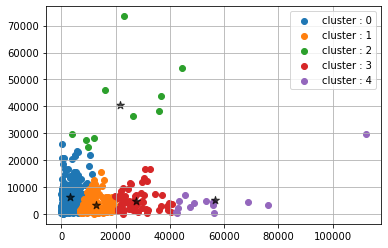

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,3


In [72]:
# 学習・グラフ化
data = np.array(df.copy())
data = data[:, 0:2].copy()
model01 = ScratchKMeans(n_clusters=5, n_init=3, max_iter=20, tol=1e-10, verbose=False, verbose_interval=1, random_state=0)
model01.fit(data)
X_cluster_labels = model01.predict(data)
show_glaph(data, X_cluster_labels, model01)

# クラスタのラベルを結合
df13['Cluster'] = X_cluster_labels.astype(int)
df13.head()

### クラスタ別の要約統計量を表示

In [73]:
for val in np.sort(df13['Cluster'].unique()):
    print('[INFO] cluster :', val)
    tmp = df13[df13['Cluster'] == val]
    display(tmp.describe())

[INFO] cluster : 0


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.0
mean,1.418719,2.536946,3319.940887,6332.970443,9068.605911,1931.000000,3636.448276,1227.226601,0.0
std,0.494569,0.784986,2464.073898,5444.566054,8088.494723,2424.925149,4160.176861,1294.054431,0.0
min,1.000000,1.000000,3.000000,55.000000,137.000000,25.000000,5.000000,3.000000,0.0
25%,1.000000,2.000000,1190.000000,1991.500000,2399.500000,497.000000,315.000000,324.500000,0.0
50%,1.000000,3.000000,2932.000000,5139.000000,6861.000000,1120.000000,1860.000000,834.000000,0.0
75%,2.000000,3.000000,5202.500000,8741.500000,13328.500000,2381.000000,5967.000000,1632.000000,0.0
max,2.000000,3.000000,11223.000000,25862.000000,45828.000000,17866.000000,24231.000000,7844.000000,0.0


[INFO] cluster : 1


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.0
mean,1.227273,2.532468,12787.253247,3209.967532,5160.201299,3264.688312,1613.324675,1150.259740,1.0
std,0.420437,0.768402,3818.428729,2826.806301,7005.002523,4138.265891,3661.977283,1404.455835,0.0
min,1.000000,1.000000,6884.000000,201.000000,3.000000,47.000000,3.000000,46.000000,1.0
25%,1.000000,2.000000,9571.250000,1180.250000,1982.750000,830.000000,211.250000,398.500000,1.0
50%,1.000000,3.000000,12165.500000,2195.500000,3008.000000,1860.500000,476.000000,746.000000,1.0
75%,1.000000,3.000000,16210.000000,4250.250000,5870.750000,4169.000000,1766.750000,1520.500000,1.0
max,2.000000,3.000000,20398.000000,15488.000000,67298.000000,35009.000000,38102.000000,14472.000000,1.0


[INFO] cluster : 2


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.0
mean,1.900000,2.700000,21784.400000,40345.700000,39849.100000,6644.900000,18480.900000,8776.00000,2.0
std,0.316228,0.674949,13765.926487,14951.700625,23396.512957,10718.188886,11416.900304,14513.19745,0.0
min,1.000000,1.000000,4098.000000,25071.000000,17645.000000,987.000000,239.000000,903.00000,2.0
25%,2.000000,3.000000,10349.000000,28717.500000,23230.750000,1500.000000,13741.000000,1723.00000,2.0
50%,2.000000,3.000000,19521.000000,37396.000000,32074.000000,3243.000000,19158.000000,2907.00000,2.0
75%,2.000000,3.000000,33549.750000,45635.250000,51601.750000,5049.500000,23145.750000,6131.25000,2.0
max,2.000000,3.000000,44466.000000,73498.000000,92780.000000,36534.000000,40827.000000,47943.00000,2.0


[INFO] cluster : 3


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.00000,59.000000,59.000000,59.0
mean,1.220339,2.559322,27569.271186,4983.949153,6441.898305,4776.40678,1355.966102,1942.152542,3.0
std,0.418033,0.771724,5720.702937,4008.645409,5668.393711,8511.96444,2139.318252,1625.666132,0.0
min,1.000000,1.000000,19913.000000,134.000000,218.000000,42.00000,9.000000,3.000000,3.0
25%,1.000000,2.000000,22631.000000,1711.000000,2469.500000,945.50000,220.500000,826.500000,3.0
50%,1.000000,3.000000,26400.000000,3836.000000,4955.000000,2436.00000,500.000000,1391.000000,3.0
75%,1.000000,3.000000,30818.000000,7168.000000,8374.500000,4648.50000,1300.000000,2583.000000,3.0
max,2.000000,3.000000,40721.000000,16784.000000,34792.000000,60869.00000,12591.000000,6854.000000,3.0


[INFO] cluster : 4


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
count,14.0,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.0
mean,1.0,2.571429,56608.214286,5208.500000,6028.642857,7759.857143,1171.071429,3023.500000,4.0
std,0.0,0.851631,18915.933602,7279.064994,4951.181422,5720.245918,1181.905532,3875.281166,0.0
min,1.0,1.000000,42312.000000,286.000000,471.000000,1200.000000,32.000000,22.000000,4.0
25%,1.0,3.000000,43858.750000,2216.750000,2245.250000,3569.750000,735.250000,846.750000,4.0
50%,1.0,3.000000,51134.000000,3734.500000,5394.000000,6367.000000,897.500000,2036.000000,4.0
75%,1.0,3.000000,56140.000000,4860.000000,7921.750000,9674.500000,1386.750000,2811.500000,4.0
max,1.0,3.000000,112151.000000,29627.000000,18148.000000,18028.000000,4948.000000,14351.000000,4.0


### 全ての変数でクラスタリング

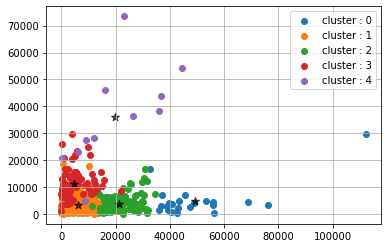

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,2


In [76]:
# 学習・グラフ化
data = np.array(df.copy())
model01 = ScratchKMeans(n_clusters=5, n_init=3, max_iter=20, tol=1e-10, verbose=False, verbose_interval=1, random_state=0)
model01.fit(data)
X_cluster_labels = model01.predict(data)
show_glaph(data, X_cluster_labels, model01)

# クラスタのラベルを結合
df13['Cluster'] = X_cluster_labels.astype(int)
df13.head()

In [78]:
# 全体の傾向
df13.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,1.627273
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,0.926542
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,0.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,1.000000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,1.000000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,2.000000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,4.000000


In [82]:
for val in np.sort(df13['Cluster'].unique()):
    print('[INFO] cluster :', val)
    tmp = df13[df13['Cluster'] == val]
    display(tmp.describe().loc[['mean'],:])

[INFO] cluster : 0


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
mean,1.086957,2.695652,49296.086957,4983.782609,5590.304348,8285.782609,962.26087,2543.695652,0.0


[INFO] cluster : 1


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
mean,1.158371,2.524887,6089.285068,3253.276018,4020.217195,2474.742081,1181.742081,980.049774,1.0


[INFO] cluster : 2


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
mean,1.201923,2.548077,21200.057692,3886.423077,5138.932692,4119.855769,1131.519231,1690.336538,2.0


[INFO] cluster : 3


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
mean,1.91358,2.54321,4654.469136,11296.320988,17856.493827,1433.037037,7793.753086,1574.049383,3.0


[INFO] cluster : 4


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
mean,1.909091,2.545455,19888.272727,36142.363636,45517.454545,6328.909091,21417.090909,8414.0,4.0


### 【考察】

- cluster:0に分類される顧客へは、Fresh・Frozen・Delicassenのクロスセルを狙える可能性あり
- cluster:4に分類される顧客へは、Milk・Grocery・Detergentsのクロスセルを狙える可能性あり

## 4.他の非階層クラスタリング手法

## 【問題13】（アドバンス課題）他の手法の調査
今回扱ったK-means以外に非階層クラスタリングで有名な手法としては DBSCAN 、
PCA以外に次元削減手法で有名な手法としては t-SNE や LLE があります。


- DBSCANのメリット・デメリット
- t-SNE、LLEのメリット・デメリット

について記述してください。

### ■DBSCANのメリット・デメリット

DBSCANは、Density-based spatial clustering of applications with noiseの略称。直訳すると「ノイズを伴うアプリケーションの密度ベースの空間クラスタリング」

- メリット
  - クラスタ数の設定が不要
  - ノイズの除去（どのコア点からも到達不可能な点を、外れ値（ノイズ）として判別することが可能）
  - 外れ値の影響を受けにくい


- デメリット
  - 計算コストが高く、リアルタイム性のアプリケーションには実装しにくい
  - クラスタ間で密度が異なる場合や、データが密集している場合に不向き

<img src="../img/07_01.png"></img>

### ■t-SNE、LLEのメリット・デメリット
特徴
- 次元削減には、射影と多様体学習という2つの主なアプローチがある。PCAは射影、t-SNEとLLEは多様体学習

【t-SNE】
- メリット
  - PCAなどの可視化手法とは異なり、線形では表現できない関係も学習して次元削減を行える
  - PCAなどと比較してより複雑なデータでも有効に働きやすい


- デメリット
  - Perplexity(内部のパラメータ)を変えると全くことなるクラスターが出現してしまう
  
  
【LLE】
- メリット
  - 大域的な位置関係を保存できる長所がある。

  
- デメリット
  - 多様体が複数ある場合、互いの位置関係をうまく保存できない。
  - 圧縮後のデータ位置を再構成する計算量がデータ数の2乗に比例するため、大規模なデータに適用しづらい

<br>
※多様体学習の例

- t-SNE (t-distributed Stochastic Neighbor Embedding)
- LLE
- 多次元尺度法 (multi-dimensional scaling, MDS)
- Isomap
- UMAP (Uniform Manifold Approximation and Projection)

## 【問題14】（アドバンス課題）t-SNEとDBSCANの利用
Wholesale customersのデータに対して、PCAではなく、 t-SNE を用いて次元削減をしてください。さらにK-meansではなく、 DBSCAN を用いてクラスタリングしてください。


そのクラスタリング結果をPCA+kmeansの場合の結果と比較してみましょう。実装にはscikit-learnを用いてください。


sklearn.manifold.TSNE — scikit-learn 0.20.2 documentation


sklearn.cluster.DBSCAN — scikit-learn 0.20.2 documentation

### 《パラメーターチューニング》


これらはK-meansやPCAに比べパラメーターチューニングが難しい手法です。scikit-learnのドキュメントと共に論文も参考にしながらパラメータの意味を確認することも大切になります。

In [43]:
# クラスタ別のグラフ化
def test_glaph(data, pred):
    cluster_labels = np.sort(np.unique(pred))
    n_clusters = len(cluster_labels)
    
    for val in cluster_labels:
        idx = np.where(pred == val)[0]
        tmp_data = data[idx,:]
        plt.scatter(tmp_data[:,0], tmp_data[:,1], alpha=.7, label=val)
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()

In [44]:
data = np.array(df)
tsne = TSNE(n_components=2, perplexity=50.0)
data_tsne = tsne.fit_transform(data)

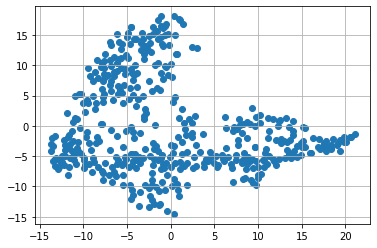

In [45]:
plt.scatter(data_tsne[:, 0], data_tsne[:, 1])
plt.grid(True)
plt.show()

In [46]:
ds = DBSCAN(eps=1.5, min_samples=5)
ds_pred = ds.fit_predict(data_tsne)
ds_pred

array([-1,  1,  1,  1,  1,  0,  0,  1,  3,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  3,  1,  1,  1,  1, -1,  1,  1,  2,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  0,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,
        1,  1,  1,  1,  1,  2,  1,  1,  1,  2,  1,  1,  1,  1,  1,  3,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  0,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  0,  1,  1, -1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0

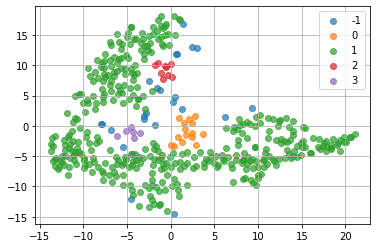

In [47]:
test_glaph(data_tsne, ds_pred)